<a href="https://colab.research.google.com/github/Bobr48/Transformer/blob/main/Copy_of_38_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**
1. [Трансформеры](https://colab.research.google.com/drive/1nVnLesLUsqaO3rQP44cfMumoB7m9DDUl)
2. [Португальско-английский переводчик на трансформере](https://colab.research.google.com/drive/1n11KroRJHEWHNRAXJFnCv7XZyLJWmf_b)
3. Домашняя работа

В домашней работе вам необходимо выполнить одно из трёх заданий на выбор:

**Задание 1. На 3 балла:**

Создайте переводчик с одного языка на другой, отличные от тех, что использовались в уроке. Сравните результаты переводов для 4-х, 6-и и 8-и голов (`num_heads`), при одинаковых прочих параметрах. Сделайте выводы письменно в колабе.

**Задание 2. На 4 балла:**

Постройте трансформер для задачи `question answering`. Трансформер должен работать по принципу чат-бота: принимать на вход вопрос, и генерировать ответ на этот вопрос. В качестве датасета используйте `web_questions` из tensorflow_datasets.

Меняя гиперпараметры, добейтесь адекватного качества ответов.

**Задание 3. На 5 баллов:**

Постройте трансформер для задачи `question answering`. Трансформер должен работать по принципу чат-бота: принимать на вход вопрос, и генерировать ответ на этот вопрос.

В качестве датасета необходимо использовать русско-язычный диалог от Денчика с HuggingFace:

```python
dataset = load_dataset('Den4ikAI/russian_dialogues', split='train', )
```

Меняя гиперпараметры, добейтесь адекватного качества ответов.

На 5 баллов задание выполняется самостоятельно без помощи куратора!

In [ ]:
# Установим свежую версию TensorFlow для поддержки слоя `tf.keras.layers.MultiHeadAttention`.
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
!pip uninstall -y -q tensorflow keras tensorflow-estimator tensorflow-text
!pip install protobuf~=3.20.3
!pip install -q tensorflow_datasets
!pip install -q -U tensorflow-text tensorflow
!pip install datasets


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package libcudnn8 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Version '8.1.0.77-1+cuda11.2' for 'libcudnn8' was not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
  Attemp

In [ ]:
# Логирование для отладки
import logging
from datasets import load_dataset
# Замеры времени выполнения
import time

# Линейная алгебра
import numpy as np

# Вывод графиков
import matplotlib.pyplot as plt

# Фреймворк Tensorflow
import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text as text
# Регулярные выражения
import re

# Файловая система
import pathlib

# Токенизатор
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

# Отключим мешаюшие предупреждения
import warnings
warnings.filterwarnings("ignore")

num_layers = 3

d_model = 256

dff = 512

num_heads = 8

dropout_rate = 0.25

EPOCHS = 10

DS_SIZE = 10000

# Размер буфера в памяти при подготовке датасета
BUFFER_SIZE = 20000

# Размер пакета
BATCH_SIZE = 128

In [ ]:
num_layers = 3
d_model = 256
dff = 512   #512
num_heads = 6 #8
dropout_rate = 0.2

EPOCHS = 10

DS_SIZE = 7000

# Размер буфера в памяти при подготовке датасета
BUFFER_SIZE = 20000

# Размер пакета
BATCH_SIZE = 128

In [ ]:
dataset = load_dataset('Den4ikAI/russian_dialogues', split='train', )

README.md:   0%|          | 0.00/951 [00:00<?, ?B/s]

dataset.jsonl:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2477321 [00:00<?, ? examples/s]

In [ ]:
print(dataset)

Dataset({
    features: ['question', 'answer', 'relevance'],
    num_rows: 2477321
})


In [ ]:
dataset = filter(lambda x : x['question'] != None and x['answer']!= None and x['relevance'] == 1, dataset)

In [ ]:
questions, answers = [], []
questions_val, answers_val = [], []
data_val, data_train = [], []
c=0
for i in dataset:
  c+=1
  if c % 50 == 0:
    #data_val.append((tf.constant(i['question']), tf.constant(i['answer'])))
    questions_val.append(tf.constant(i['question']))
    answers_val.append(tf.constant(i['answer']))
  else:
    #data_train((tf.constant(i['question']), tf.constant(i['answer'])))
    questions.append(tf.constant(i['question']))
    answers.append(tf.constant(i['answer']))
  if c == DS_SIZE:
    break

print(len(questions), len(answers))
print(len(questions_val), len(answers_val))

6860 6860
140 140


In [ ]:
dataset = None
data_val = tf.data.Dataset.from_tensor_slices((questions_val, answers_val))
data_train = tf.data.Dataset.from_tensor_slices((questions, answers))


In [ ]:
VOCAB_SIZE = 8000
# Параметры токенизатора (lower_case - приводим к нижнему регистру)
bert_tokenizer_params=dict(lower_case=True)

# Определяем токены, с которыми работает токенизатор
# [START] - начало строки
# [END]   - конец строки
# [UNK]   - неизвестное слово
# [PAD]   - используется для выравнивания длин всех предложений
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # Желаемый размер словаря
    vocab_size = VOCAB_SIZE,
    # Токены включаемые в словарь
    reserved_tokens=reserved_tokens,
    # Аргументы для `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Аргументы для `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={}, # не используем, но определяем чтобы не было ошибок
)

In [ ]:
#train_en = answers
train_pt = questions + answers
train_pt = tf.data.Dataset.from_tensor_slices(train_pt)

In [ ]:
%%time
#pt_vocab
vocab = bert_vocab.bert_vocab_from_dataset(
    train_pt.batch(1000).prefetch(2),
    **bert_vocab_args
)

CPU times: user 1min 36s, sys: 458 ms, total: 1min 37s
Wall time: 1min 38s


In [ ]:
print(vocab[:10])
print(vocab[100:110])
print(vocab[1000:1010])
print(vocab[-10:])

['[PAD]', '[UNK]', '[START]', '[END]', '!', ',', '-', '.', ':', ';']
['чем', 'только', '##х', 'будет', 'вас', '##ы', 'бы', 'ну', 'может', '##ю']
['##ании', '##внои', '##вое', '##даю', '##дите', '##ею', '##жает', '##зывает', '##кам', '##нать']
['##p', '##q', '##r', '##u', '##v', '##w', '##x', '##y', '##z', '##ъ']


In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
write_vocab_file('vocab.txt', vocab)

In [ ]:
pt_tokenizer = text.BertTokenizer('vocab.txt', **bert_tokenizer_params)
en_tokenizer = text.BertTokenizer('vocab.txt', **bert_tokenizer_params)

In [ ]:
print(data_train.batch(3).take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>


In [ ]:
print('Отберем строки для примера:')
for pt_examples, en_examples in data_train.batch(3).take(1):
  for ex in en_examples:
    print(ex.numpy())

Отберем строки для примера:
b'\xd1\x8f \xd1\x80\xd1\x8f\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xba\xd1\x83 \xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5 \xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e.'
b'\xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe \xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82 \xd0\xba\xd0\xbe\xd0\xbc\xd0\xb8\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd1\x82\xd1\x8c \xd0\xb4\xd0\xbe\xd0\xba\xd1\x83\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e'
b'\xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb9 \xd0\xbf\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb8\xd0\xbc \xd0\xbe \xd1\x87\xd0\xb5\xd0\xbc-\xd0\xbd\xd0\xb8\xd0\xb1\xd1\x83\xd0\xb4\xd1\x8c \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd0\xbc'


In [ ]:
# Токенизируем примеры и получаем тензор формы (batch, word, word-piece)
token_batch = en_tokenizer.tokenize(en_examples)
# Объединяем оси word и word-piece и получаем тензор формы (batch, tokens)
token_batch = token_batch.merge_dims(-2,-1)

print('Токенизируем отобранные строки:')
for ex in token_batch.to_list():
  print(ex)

Токенизируем отобранные строки:
[67, 52, 111, 519, 654, 116, 190, 7]
[741, 94, 2675, 941, 122, 2499, 278, 285, 2393, 544, 179, 212, 2448, 2126]
[780, 85, 2403, 923, 50, 100, 6, 215, 1452]


In [ ]:
words = en_tokenizer.detokenize(token_batch)
print('Проверим обратное преобразование:')

# Объединение полученного тензора в текст, объединяем пробелами
print(tf.strings.reduce_join(words, separator=' ', axis=-1))


Проверим обратное преобразование:
tf.Tensor(
[b'\xd1\x8f \xd1\x80\xd1\x8f\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xba\xd1\x83 \xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5 \xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e .'
 b'\xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe \xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82 \xd0\xba\xd0\xbe\xd0\xbc\xd0\xb8\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd1\x82\xd1\x8c \xd0\xb4\xd0\xbe\xd0\xba\xd1\x83\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e'
 b'\xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb8 \xd0\xbf\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb8\xd0\xbc \xd0\xbe \xd1\x87\xd0\xb5\xd0\xbc - \xd0\xbd\xd0\xb8\xd0\xb1\xd1\x83\xd0\xb4\xd1\x8c \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd0\xbc'], shape=(3,), dtype=string)


In [ ]:
lengths = []

for pt_examples, en_examples in data_train.batch(1024):
  pt_tokens = pt_tokenizer.tokenize(pt_examples)
  lengths.append(pt_tokens.row_lengths())

  en_tokens = en_tokenizer.tokenize(en_examples)
  lengths.append(en_tokens.row_lengths())


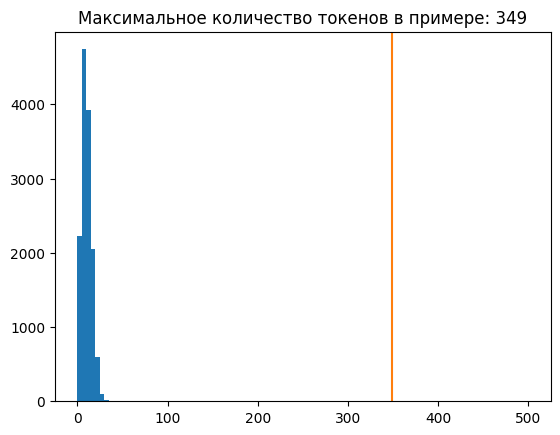

In [ ]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Максимальное количество токенов в примере: {max_length}');



In [ ]:
MAX_TOKENS=64

In [ ]:
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)

In [ ]:
words = en_tokenizer.detokenize(add_start_end(token_batch))
tf.strings.reduce_join(words, separator=' ', axis=-1)

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'[START] \xd1\x8f \xd1\x80\xd1\x8f\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xba\xd1\x83 \xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5 \xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e . [END]',
       b'[START] \xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe \xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82 \xd0\xba\xd0\xbe\xd0\xbc\xd0\xb8\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd1\x82\xd1\x8c \xd0\xb4\xd0\xbe\xd0\xba\xd1\x83\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e [END]',
       b'[START] \xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb8 \xd0\xbf\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb8\xd0\xbc \xd0\xbe \xd1\x87\xd0\xb5\xd0\xbc - \xd0\xbd\xd0\xb8\xd0\xb1\xd1\x83\xd0\xb4\xd1\x8c \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd0\xbc [END]'],
      dtype=object)>

In [ ]:
def cleanup_text(reserved_tokens, token_txt):
  # Удаление токенов, кроме "[UNK]".
  # Поиск зарезервированных токенов кроме [UNK]
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  # "Плохие" токены для регулярки объединяем знаком ИЛИ (|)
  bad_token_re = "|".join(bad_tokens)

  # Ищем в строке регулярку
  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  # Отсеиваем из исходной строки все найденные включения "плохих" токенов
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Сцепление строк.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [ ]:
print('Отберем строки для примера:')
for pt_examples, en_examples in data_train.batch(3).take(1):
  for ex in en_examples:
    print(ex.numpy())

Отберем строки для примера:
b'\xd1\x8f \xd1\x80\xd1\x8f\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xba\xd1\x83 \xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5 \xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e.'
b'\xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe \xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82 \xd0\xba\xd0\xbe\xd0\xbc\xd0\xb8\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd1\x82\xd1\x8c \xd0\xb4\xd0\xbe\xd0\xba\xd1\x83\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e'
b'\xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb9 \xd0\xbf\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb8\xd0\xbc \xd0\xbe \xd1\x87\xd0\xb5\xd0\xbc-\xd0\xbd\xd0\xb8\xd0\xb1\xd1\x83\xd0\xb4\xd1\x8c \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd0\xbc'


In [ ]:
en_examples.numpy()

array([b'\xd1\x8f \xd1\x80\xd1\x8f\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xba\xd1\x83 \xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5 \xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e.',
       b'\xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe \xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82 \xd0\xba\xd0\xbe\xd0\xbc\xd0\xb8\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd1\x82\xd1\x8c \xd0\xb4\xd0\xbe\xd0\xba\xd1\x83\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e',
       b'\xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb9 \xd0\xbf\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb8\xd0\xbc \xd0\xbe \xd1\x87\xd0\xb5\xd0\xbc-\xd0\xbd\xd0\xb8\xd0\xb1\xd1\x83\xd0\xb4\xd1\x8c \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd0\xbc'],
      dtype=object)

In [ ]:
token_batch = en_tokenizer.tokenize(en_examples).merge_dims(-2,-1)
words = en_tokenizer.detokenize(token_batch)
words

<tf.RaggedTensor [[b'\xd1\x8f', b'\xd1\x80\xd1\x8f\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xba\xd1\x83',
  b'\xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5',
  b'\xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e', b'.']                       ,
 [b'\xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe',
  b'\xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0',
  b'\xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82',
  b'\xd0\xba\xd0\xbe\xd0\xbc\xd0\xb8\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f',
  b'\xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd1\x82\xd1\x8c',
  b'\xd0\xb4\xd0\xbe\xd0\xba\xd1\x83\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e'],
 [b'\xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb8',
  b'\xd0\xbf\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb8\xd0\xbc',
  b'\xd0\xbe', b'\xd1\x87\xd0\xb5\xd0\xbc', b'-',
  b'\xd0\xbd\xd0\xb8\xd0\xb1\xd1\x83\xd0\xb4\xd1\x8c',
  b'\xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd0\xbc']                        ]>

In [ ]:
cleanup_text(reserved_tokens, words).numpy()

array([b'\xd1\x8f \xd1\x80\xd1\x8f\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xba\xd1\x83 \xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5 \xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e .',
       b'\xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe \xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82 \xd0\xba\xd0\xbe\xd0\xbc\xd0\xb8\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd1\x82\xd1\x8c \xd0\xb4\xd0\xbe\xd0\xba\xd1\x83\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e',
       b'\xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb8 \xd0\xbf\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb8\xd0\xbc \xd0\xbe \xd1\x87\xd0\xb5\xd0\xbc - \xd0\xbd\xd0\xb8\xd0\xb1\xd1\x83\xd0\xb4\xd1\x8c \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd0\xbc'],
      dtype=object)

In [ ]:
class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    # Определяем токенизатор
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    # Зарезервированные токены
    self._reserved_tokens = reserved_tokens
    # Путь к файлу словаря
    self._vocab_path = tf.saved_model.Asset(vocab_path)
    # Читаем из файла словарь и делим по строкам
    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    # Для экспорта класса необходимо создать так называемые сигнатуры,
    # чтобы tensorflow понимал с какими данными он работает

    # Сигнатура для tokenize (работает с пакетами строк).
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))

    # Сигнатура для `detokenize` и `lookup`
    # Могут работать как с `Tensors`, так и `RaggedTensors`
    # с тензорами формы [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    # Методы `get_*` не имеют аргументов
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()

    # После определения сигнатур можно определить и сами методы класса

  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Объединяем оси `word` и `word-piece` (как в примере выше)
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words) # очищаем перед выводом

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids) # возвращаем явное соответствие словаря токенам

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0] # определяем длину словаря по нулевому индексу формы

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path # получение пути к файлу словаря

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens) # получение списка зарезервированных токенов


In [ ]:
tokenizers = tf.Module()
tokenizers.pt = CustomTokenizer(reserved_tokens, 'vocab.txt')
tokenizers.en = CustomTokenizer(reserved_tokens, 'vocab.txt')

In [ ]:
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.saved_model.save(tokenizers, model_name)

In [ ]:
encoded = tokenizers.en.tokenize(en_examples)

for row in encoded.to_list():
  print(row)

[2, 67, 52, 111, 519, 654, 116, 190, 7, 3]
[2, 741, 94, 2675, 941, 122, 2499, 278, 285, 2393, 544, 179, 212, 2448, 2126, 3]
[2, 780, 85, 2403, 923, 50, 100, 6, 215, 1452, 3]


In [ ]:
round_trip = tokenizers.en.detokenize(encoded)
for line in round_trip.numpy():
  print(line.decode('utf-8'))

я ряженку лучше люблю .
особенно когда придет комиссия проверять документацию
даваи поговорим о чем - нибудь другом


In [ ]:
tokens = tokenizers.en.lookup(encoded)
tokens

<tf.RaggedTensor [[b'[START]', b'\xd1\x8f', b'\xd1\x80', b'##\xd1\x8f',
  b'##\xd0\xb6\xd0\xb5', b'##\xd0\xbd\xd0\xba\xd1\x83',
  b'\xd0\xbb\xd1\x83\xd1\x87\xd1\x88\xd0\xb5',
  b'\xd0\xbb\xd1\x8e\xd0\xb1\xd0\xbb\xd1\x8e', b'.', b'[END]'],
 [b'[START]',
  b'\xd0\xbe\xd1\x81\xd0\xbe\xd0\xb1\xd0\xb5\xd0\xbd\xd0\xbd\xd0\xbe',
  b'\xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0',
  b'\xd0\xbf\xd1\x80\xd0\xb8\xd0\xb4\xd0\xb5\xd1\x82', b'\xd0\xba\xd0\xbe',
  b'##\xd0\xbc\xd0\xb8', b'##\xd1\x81\xd1\x81', b'##\xd0\xb8\xd1\x8f',
  b'\xd0\xbf\xd1\x80\xd0\xbe', b'##\xd0\xb2\xd0\xb5\xd1\x80',
  b'##\xd1\x8f\xd1\x82\xd1\x8c', b'\xd0\xb4\xd0\xbe', b'##\xd0\xba\xd1\x83',
  b'##\xd0\xbc\xd0\xb5\xd0\xbd\xd1\x82',
  b'##\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8e', b'[END]']                          ,
 [b'[START]', b'\xd0\xb4\xd0\xb0\xd0\xb2\xd0\xb0\xd0\xb8',
  b'\xd0\xbf\xd0\xbe', b'##\xd0\xb3\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x80',
  b'##\xd0\xb8\xd0\xbc', b'\xd0\xbe', b'\xd1\x87\xd0\xb5\xd0\xbc', b'-',
  b'\xd0\xbd\xd0\xb8\x

In [ ]:

def prepare_batch(pt, en):
    pt = tokenizers.pt.tokenize(pt)   # Токенизируем данные
    pt = pt[:, :MAX_TOKENS]           # Выравнивание данных по MAX_TOKENS.
    pt = pt.to_tensor()               # Преобразуем в тензор с равномерными измерениями

    en = tokenizers.en.tokenize(en)
    en = en[:, :(MAX_TOKENS+1)]
    en_inputs = en[:, :-1].to_tensor()  # Удаляем [END] токены (вход декодировщика)
    en_labels = en[:, 1:].to_tensor()   # Удаляем [START] токены (выход декодировщика)

    return (pt, en_inputs), en_labels

In [ ]:
def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)                     # перемешиваем данные
      .batch(BATCH_SIZE)                        # делим датасет на пакеты
      .map(prepare_batch, tf.data.AUTOTUNE)     # применим функцию prepare_batch
      .prefetch(buffer_size=tf.data.AUTOTUNE))  # prefetch используется для разделения времени, когда данные подготавливаются и потребляются, что ускоряет обучение сети

In [ ]:
train_batches = make_batches(data_train)
val_batches = make_batches(data_val)

In [ ]:
for (pt, en), en_labels in train_batches.take(1):
  break

print(pt.shape)
print(en.shape)
print(en_labels.shape)

(128, 47)
(128, 64)
(128, 64)


In [ ]:
# length - порядковый номер слова в фразе
# depth - размер пространства эмбеддинга
def positional_encoding(length, depth):
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # форма (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # форма (1, depth)

  angle_rates = 1 / (10000**depths)         # форма (1, depth)
  angle_rads = positions * angle_rates      # форма (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)  # указываем тип возвращаемых данных

In [ ]:
pos_encoding = positional_encoding(length=2048, depth=512)

# Прверим форму
print(pos_encoding.shape)


(2048, 512)


In [ ]:
# Наследуем класс от tf.keras.layers.Layer
# Теперь наш слой тоже является классом Keras
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True) # эмбеддинг
    self.pos_encoding = positional_encoding(length=2048, depth=d_model) # позиционное кодирование

  # Данный метод возвращает маску эмбеддинга
  # Так как вектора выравниваются до одной длины с помощью pad_sequences,
  # то метод вернет True для ненулевых токенов, и False для нулевых токенов

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)

    # Этот коэффициент задает относительный масштаб встраивания и позиционного кодирования
    # C этим параметром можно и нужно играться!
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x


In [ ]:
embed_pt = PositionalEmbedding(vocab_size=tokenizers.pt.get_vocab_size().numpy(), d_model=512)
embed_en = PositionalEmbedding(vocab_size=tokenizers.en.get_vocab_size().numpy(), d_model=512)

pt_emb = embed_pt(pt)
en_emb = embed_en(en)

In [ ]:
en_emb._keras_mask

<tf.Tensor: shape=(128, 64), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

In [ ]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

In [ ]:
d = {'color': 'blue', 'age': 22, 'type': 'pickup'}
result = d['color']

In [ ]:
class CrossAttention(BaseAttention):
  def call(self, x, context):
    # Пропускаем сигнал через многоголовое внимание
    attn_output, attn_scores = self.mha(
        query=x,                        # запрос
        key=context,                    # ключ
        value=context,                  # значение
        return_attention_scores=True)   # возвращаем оценки внимания

    # Запоминаем оценки на будущее
    self.last_attn_scores = attn_scores

    # Добавляем остаточную связь и нормализацию
    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [ ]:
# При инициализации через базовый класс передаем в слой tf.keras.layers.MultiHeadAttention
# параметры num_heads - число голов, key_dim - размерность ключа
sample_ca = CrossAttention(num_heads=2, key_dim=512)

print(pt_emb.shape)
print(en_emb.shape)
print(sample_ca(en_emb, pt_emb).shape)

(128, 47, 512)
(128, 64, 512)
(128, 64, 512)


In [ ]:
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    # Пропускаем сигнал через многоголовое внимание
    attn_output = self.mha(
        query=x,  # запрос
        value=x,  # ключ
        key=x)    # значение

    # Добавляем остаточную связь и нормализацию
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [ ]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(pt_emb.shape)
print(sample_gsa(pt_emb).shape)

(128, 47, 512)
(128, 47, 512)


In [ ]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)  # отличается от GlobalSelfAttention одним аргументом
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [ ]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(en_emb.shape)
print(sample_csa(en_emb).shape)

(128, 64, 512)
(128, 64, 512)


In [ ]:
out1 = sample_csa(embed_en(en[:, :3]))
out2 = sample_csa(embed_en(en))[:, :3]

tf.reduce_max(abs(out1 - out2)).numpy()

7.1525574e-07

In [ ]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x

In [ ]:
sample_ffn = FeedForward(512, 2048)

print(en_emb.shape)
print(sample_ffn(en_emb).shape)

(128, 64, 512)
(128, 64, 512)


In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,  # число голов
        key_dim=d_model,      # размерность ключа
        dropout=dropout_rate) # уровень регуляризации

    self.ffn = FeedForward(d_model, dff) # число нейронов во втором и первом Dense слое, соответственно

  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

In [ ]:
sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

print(pt_emb.shape)
print(sample_encoder_layer(pt_emb).shape)

(128, 47, 512)
(128, 47, 512)


In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    # Инициируем переменные внутри класса
    self.d_model = d_model
    self.num_layers = num_layers

    # Создаем объект класса позиционного кодирования
    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    # Создаем объект класса для слоя кодировщика
    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    # Создаем объект класса для слоя регуляризации
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    # Форма x токена: (batch, seq_len)
    # Прогоняем последовательность токенов через слой позиционного кодирования
    x = self.pos_embedding(x)  # форма на выходе (batch_size, seq_len, d_model)

    # Прогоняем последовательность токенов через слой регуляризации
    x = self.dropout(x)

    # Прогоняем последовательность токенов через num_layers слоев кодировщика
    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # форма на выходе (batch_size, seq_len, d_model)

In [ ]:
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=VOCAB_SIZE)

sample_encoder_output = sample_encoder(pt, training=False)

print(pt.shape)
print(sample_encoder_output.shape)  # форма на выходе (batch_size, input_seq_len, d_model)

(128, 47)
(128, 47, 512)


In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    # Слой внимания с причинно-следственной связью
    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    # Слой с кросс-вниманием
    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    # Слой прямого распространения
    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    # Пропускаем последовательность токенов через:
    # Каузальный слой внимания
    x = self.causal_self_attention(x=x)
    # Слой кросс-внимания и контекстным вектором из кодировщика
    x = self.cross_attention(x=x, context=context)

    # Запомним оценки внимания на будущее
    self.last_attn_scores = self.cross_attention.last_attn_scores
    # Через слой прямого распространения
    x = self.ffn(x)  # Форма `(batch_size, seq_len, d_model)`.
    return x

In [ ]:
sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)

sample_decoder_layer_output = sample_decoder_layer(
    x=en_emb, context=pt_emb)

print(en_emb.shape)
print(pt_emb.shape)
print(sample_decoder_layer_output.shape)  # Форма `(batch_size, seq_len, d_model)`

(128, 64, 512)
(128, 47, 512)
(128, 64, 512)


In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    # Инициируем переменные внутри класса
    self.d_model = d_model
    self.num_layers = num_layers

    # Создаем объект класса позиционного кодирования
    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    # Создаем объект класса для слоя регуляризации
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

    # Создаем сразу стек слоев декодировщиков с помощью генератора списков по числу слоев
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    # Сбрасываем оценки внимания
    self.last_attn_scores = None

  def call(self, x, context):
    # Подаем на вход последовательность токенов x формой (batch, target_seq_len)

    # Пропускаем через слой позиционного кодирования (и конечно же эмбеддинг)
    x = self.pos_embedding(x)  # форма на выходе (batch_size, target_seq_len, d_model)

    # Регуляризация
    x = self.dropout(x)

    # Прогоняем через num_layers слоев декодировщиков
    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    # Сохраняем оценки внимания из последнего слоя
    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # Форма x на выходе (batch_size, target_seq_len, d_model)
    return x

In [ ]:
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

output = sample_decoder(
    x=en,
    context=pt_emb)

print(en.shape)
print(pt_emb.shape)
print(output.shape)

(128, 64)
(128, 47, 512)
(128, 64, 512)


In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    # Кодировщик
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)
    # Декодировщик
    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)
    # Конечный слой
    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    # Чтобы использовать метод `.fit` для обучения модели, необходимо передать
    # все входные данные в первом аргументе
    context, x  = inputs

    # Передаем контекст в кодировщик
    context = self.encoder(context)  # форма выходных данных (batch_size, context_len, d_model)

    # Передаем контекст и целевой вектор в декодировщик
    x = self.decoder(x, context)  # форма выходных данных (batch_size, target_len, d_model)

    # Прогоняем выходные данные через финальный слой
    logits = self.final_layer(x)  # форма выходных данных (batch_size, target_len, target_vocab_size)

    try:
      # После прохождения данных через все слои необходимо удалить
      # маску, чтобы она не масштабировала, потери и метрики
      # Обработчик ошибок позволяет избежать исключений при повторной попытке удаления
      del logits._keras_mask
    except AttributeError: # отлавливаем ошибку отсутствия аттрибута
      pass

    # Возвращаем наши логиты
    return logits

In [ ]:
#logits = tf.layers.dense(inputs=dropout, units=10)


In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.pt.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.en.get_vocab_size().numpy(),
    dropout_rate=dropout_rate)

In [ ]:
output = transformer((pt, en))

print(en.shape)
print(pt.shape)
print(output.shape)

(128, 64)
(128, 47)
(128, 64, 2767)


In [ ]:
attn_scores = transformer.decoder.dec_layers[-1].last_attn_scores
print(attn_scores.shape)  # Форма оценок внимания: (batch, heads, target_seq, input_seq)

(128, 6, 64, 47)


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

In [ ]:
# Количество батчей для обучения
num_batches = 0
for (batch, (_,_)) in enumerate(train_batches):
  num_batches = batch
print(num_batches)

53


Text(0.5, 0, 'Шаг обучения')

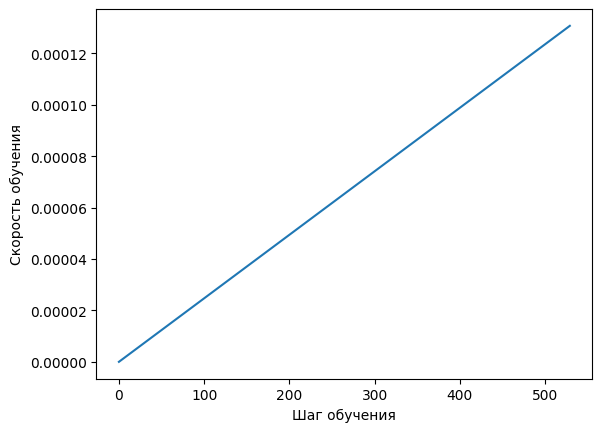

In [ ]:
plt.plot(learning_rate(tf.range(num_batches*EPOCHS, dtype=tf.float32)))
plt.ylabel('Скорость обучения')
plt.xlabel('Шаг обучения')

Text(0.5, 0, 'Шаг обучения')

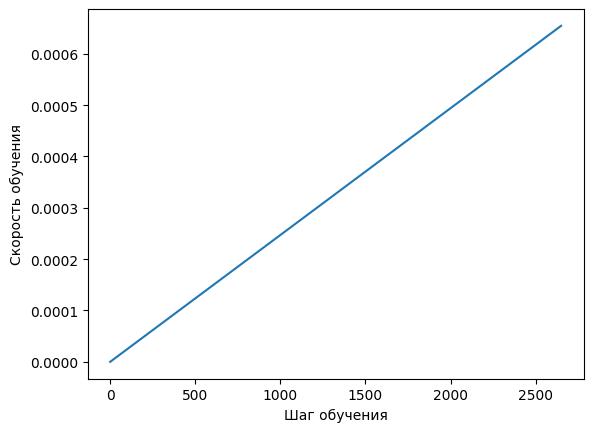

In [ ]:
plt.plot(learning_rate(tf.range(num_batches*EPOCHS*5, dtype=tf.float32)))
plt.ylabel('Скорость обучения')
plt.xlabel('Шаг обучения')

In [ ]:
# Функция потерь с учетом маски
def masked_loss(label, pred):
  # Задаем маску, где метки не равны 0
  mask = label != 0
  # Определяем функцию потерь
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  # Важно чтобы mask и loss имели одинаковый тип данных
  mask = tf.cast(mask, dtype=loss.dtype)
  # Наложение маски на loss
  loss *= mask

  # Масштабирование потерь на маску
  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

# Функция точности с учетом маски
def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  # Оценка совпадения метки и предсказания
  match = label == pred
  # Задаем маску, где метки не равны 0
  mask = label != 0

  # Логическое И
  match = match & mask

  # Преобразуем к одному типу и масштабирование совпадений на маску
  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [ ]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [ ]:
transformer.fit(train_batches,
                epochs=EPOCHS,
                validation_data=val_batches)

Epoch 1/10
 5/54 ━━━━━━━━━━━━━━━━━━━━ 18:28 23s/step - loss: 8.0003 - masked_accuracy: 1.2037e-04

In [ ]:
class Translator(tf.Module):
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):

    assert isinstance(sentence, tf.Tensor) # Проверяем, что последовательность является тензором
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.pt.tokenize(sentence).to_tensor()
    # Введенное предложение написано на португальском языке
    encoder_input = sentence

    # Поскольку языком вывода является английский, инициализируйте вывод с помощью токена [START]
    start_end = self.tokenizers.en.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # Здесь требуется  tf.TensorArray` (вместо списка Python), чтобы динамический цикл
    # можно было отследить с помощью `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      # на каждом шаге складываем выходные токены в массив для
      #  передачи на вход на следующем шаге
      output = tf.transpose(output_array.stack())
      # передаем в трансформер для предсказания токены
      predictions = self.transformer([encoder_input, output], training=False)

      # Выбираем последний токен из измерения `seq_len`
      predictions = predictions[:, -1:, :]  # Форма `(batch_size, 1, vocab_size)`.

      # Предсказанный токен
      predicted_id = tf.argmax(predictions, axis=-1)

      # Объединяем `predicted_id` с выходными данными, которые передаются
      # декодеру в качестве входных данных.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # Токены в текст
    text = tokenizers.en.detokenize(output)[0]  # Shape: `()`.

    tokens = tokenizers.en.lookup(output)[0]

    # `tf.function` не позволяет нам использовать значения attention_weight, которые были
    # рассчитаны на последней итерации цикла.
    # Поэтому пересчитаем их вне цикла.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

In [ ]:
translator = Translator(tokenizers, transformer)

In [ ]:
def print_translation(sentence, tokens, ground_truth):
  print(f'{"Фраза для перевода:":25s}: {sentence}')
  print(f'{"Предсказанный перевод:":25s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Оригинальный перевод":25s}: {ground_truth}')

In [ ]:
sentence = 'почему не существует счастливых людей?'
ground_truth = 'потому что несчастные и делают те единицы счастливых людей такими же.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

График внимания

In [ ]:
def plot_attention_head(in_tokens, translated_tokens, attention):
  # Пропускаем токен `[START]`
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [ ]:
head = 0  # номер головы
# Форма attention_weights: `(batch=1, num_heads, seq_len_q, seq_len_k)`.
attention_heads = tf.squeeze(attention_weights, 0) # убираем нулевое измерение тензора
attention = attention_heads[head] # выбираем нужную голову
attention.shape

In [ ]:
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.pt.lookup(in_tokens)[0]
in_tokens

In [ ]:
translated_tokens

In [ ]:
plot_attention_head(in_tokens, translated_tokens, attention)

In [ ]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.pt.lookup(in_tokens)[0]

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

In [ ]:
plot_attention_weights(sentence,
                       translated_tokens,
                       attention_weights[0])